In [8]:
import pprint
import os
import runpy
import sys
from PIL import Image
from einops import rearrange
import numpy as np
from src.preprocess import apply_net
from src.utils import get_project_root

PROJECT_ROOT_PATH = get_project_root()

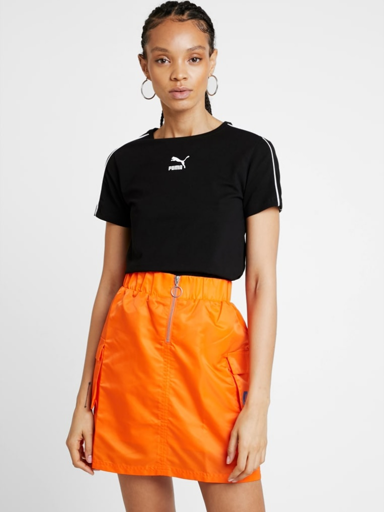

In [2]:
h, w = (512, 384)
img_path = '../assets/woman_front_view_train_00009_00.jpg'
img = Image.open(img_path).resize((w, h))
img

In [3]:
%tb
# PROJECT_ROOT_PATH = get_project_root()
# sys.argv = [
#     '',
#     'show',
#     os.path.join(PROJECT_ROOT_PATH, 'configs/densepose_rcnn_R_50_FPN_s1x.yaml'),
#     os.path.join(PROJECT_ROOT_PATH, 'checkpoints/densepose/model_final_162be9.pkl'),
#     os.path.join(PROJECT_ROOT_PATH, 'assets/woman_front_view.jpg'),
#     'dp_segm',
#     '-v',
# ]

args = apply_net.create_argument_parser().parse_args((
    'show',
    '../configs/densepose_rcnn_R_50_FPN_s1x.yaml',
    '../checkpoints/densepose/model_final_162be9.pkl',
    img_path,
    'dp_segm',
    '-v'
))
densepose_img, instances, matrix_vis, mask_bg, mask = args.func(args, img)

No traceback available to show.
/home/jupyter/H-engine/.venv38/lib/python3.8/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
denseimg = densepose_img.copy()

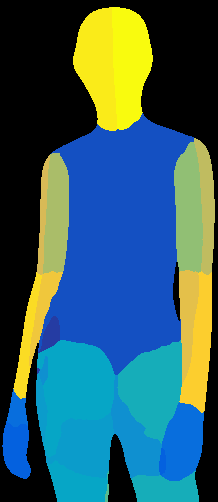

In [5]:
Image.fromarray(np.where(mask_bg, matrix_vis * 0, matrix_vis)[:, :, ::-1])

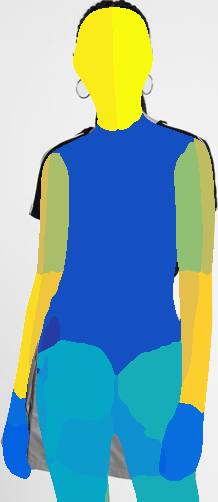

In [6]:
Image.fromarray(matrix_vis[:, :, ::-1])

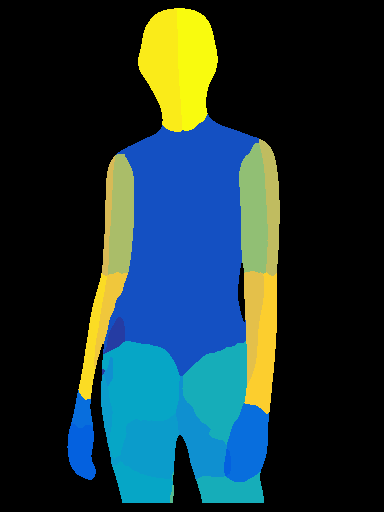

In [7]:
Image.fromarray(denseimg[:, :, ::-1])